- 뉴스/소설 등 관심 분야 텍스트 스크래핑 > 워드임베딩 > 시각화 캡처

In [159]:
import pandas as pd
import numpy as np
from selenium import webdriver
import time
from bs4 import BeautifulSoup as soup
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [160]:
driver = webdriver.Chrome()
driver.get("https://news.naver.com/")
time.sleep(1)

In [161]:
news_ranking = driver.find_elements("css selector","body > section > header > div.Nlnb._float_lnb > div > div > div > div > div > ul > li:nth-child(8) > a  > span")[0]
news_ranking.click()

In [162]:
for _ in range(6):
    more_button = driver.find_elements("css selector","#wrap > div.rankingnews._popularWelBase._persist > button")[0]
    more_button.click()

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36" lang="ko"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=1106" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/home.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221201.png" property="og:image"/>
<meta content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="
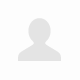
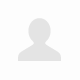

In [163]:
sp = soup(driver.page_source,"html.parser")
sp

In [164]:
len(sp.select('li>div > a')[3:]) # 뉴스 기사 개수

409

In [165]:
sp.select('li>div > a')[3:][1].text

'한동훈 "野 탄핵 논의는 국정 마비시키겠다는 불법 탄핵"'

In [166]:
news_list=[]
for i in range(len(sp.select('li>div>a')[3:])):
    news_title=sp.select('li>div > a')[3:][i].text
    news_list.append(news_title)
news_list
driver.quit()

In [167]:
news_list

["탈주범 김길수, 5억 대 전세 사기 혐의 추가…경찰, '빌라왕' 연관성 열어놓고 수사",
 '한동훈 "野 탄핵 논의는 국정 마비시키겠다는 불법 탄핵"',
 '尹 대통령, 새 대법원장 후보자에 조희대 前 대법관 지명',
 '홍준표 "대통령 호가호위하는 듣보잡들 정리해야"…인요한 "명심하겠다"',
 '기아 광주공장 생산라인 멈춰…하루 2000대 생산 차질',
 "헤즈볼라, 미 항공모함 도착에 대함미사일 공개 '맞불'",
 '크리스찬 디올, 홍보대사 팔레스타인→이스라엘인으로 교체',
 "버는 돈 불만 크고…열에 일곱은 '가계 빚 그대로'",
 '칩 부족에 고생하던 자동차업계…재고 우려에 칩 주문 축소',
 '"헤즈볼라, 전쟁에 참여하기 시작"…레바논 국경서 교전 격화',
 '남현희 "배 나오는 게 느껴져…유산된다 해도 슬프지 않을 것"…임신이라 정말 믿었나?',
 '회장 앞에서 춤추고 ‘후계자 눈도장’ 받은 20대 女…2년만에 해고 왜',
 '"이선균, \'마약\' 몰랐다면서 女실장에 왜 3억 줬나" 현직 변호사의 \'의문\'',
 '[단독] 무너진 중견 건설사에 멈춘 공사현장…결국 공매에 소송까지 몸살 [집슐랭]',
 '"딸 같아서…" \'숏컷\' 女알바 맞자 가해자 말린 50대가 꺼낸 말',
 '"거창군 전입하려면 군수님한테 수영복 심사를‥" 막말에 \'경악\'',
 '"전청조 머리채라도 잡고 싶다" 2차 출석 남현희 \'격정 SNS\'',
 '"2차전지주 1,767주 매도"‥"네" 국방장관 문자에 예결위 발칵',
 '윤 대통령, 대법원장 후보에 조희대 전 대법관 지명',
 '"도와달라" "듣보잡들 때문에 싫어!"‥인요한 면전서 직격탄 [현장영상]',
 '겨울에 70대 노모 ‘알몸’으로 내쫓은 딸…엄마는 결국',
 '“집주인이 김길수라고?” 2억5000만원 세입자 망연자실',
 '남현희 “내가 죽어야 끝날까…전청조 머리채 잡고 싶은 심정”',
 '대법원장 후보자에 ‘미스터 소수의견’ 조희대 前대법관',
 '‘비아이 수사 무마’ 양현석, 2심 징역형 집유',


In [168]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [170]:
news_list = [re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", news) for news in news_list]
news_list

['탈주범 김길수 억 대 전세 사기 혐의 추가경찰 빌라왕 연관성 열어놓고 수사',
 '한동훈  탄핵 논의는 국정 마비시키겠다는 불법 탄핵',
 ' 대통령 새 대법원장 후보자에 조희대  대법관 지명',
 '홍준표 대통령 호가호위하는 듣보잡들 정리해야인요한 명심하겠다',
 '기아 광주공장 생산라인 멈춰하루 대 생산 차질',
 '헤즈볼라 미 항공모함 도착에 대함미사일 공개 맞불',
 '크리스찬 디올 홍보대사 팔레스타인이스라엘인으로 교체',
 '버는 돈 불만 크고열에 일곱은 가계 빚 그대로',
 '칩 부족에 고생하던 자동차업계재고 우려에 칩 주문 축소',
 '헤즈볼라 전쟁에 참여하기 시작레바논 국경서 교전 격화',
 '남현희 배 나오는 게 느껴져유산된다 해도 슬프지 않을 것임신이라 정말 믿었나',
 '회장 앞에서 춤추고 후계자 눈도장 받은 대 년만에 해고 왜',
 '이선균 마약 몰랐다면서 실장에 왜 억 줬나 현직 변호사의 의문',
 '단독 무너진 중견 건설사에 멈춘 공사현장결국 공매에 소송까지 몸살 집슐랭',
 '딸 같아서 숏컷 알바 맞자 가해자 말린 대가 꺼낸 말',
 '거창군 전입하려면 군수님한테 수영복 심사를 막말에 경악',
 '전청조 머리채라도 잡고 싶다 차 출석 남현희 격정 ',
 '차전지주 주 매도네 국방장관 문자에 예결위 발칵',
 '윤 대통령 대법원장 후보에 조희대 전 대법관 지명',
 '도와달라 듣보잡들 때문에 싫어인요한 면전서 직격탄 현장영상',
 '겨울에 대 노모 알몸으로 내쫓은 딸엄마는 결국',
 '집주인이 김길수라고 억만원 세입자 망연자실',
 '남현희 내가 죽어야 끝날까전청조 머리채 잡고 싶은 심정',
 '대법원장 후보자에 미스터 소수의견 조희대 대법관',
 '비아이 수사 무마 양현석 심 징역형 집유',
 '주운 만원짜리 앵무새 반환 거부하고 날려보냈다가 벌금형',
 ' 똑똑한 여성 때문에 발전 인요한 발언에이준석 이렇게 하면 여성표 오르나',
 '집 정리 중 버리려던 그림 억짜리였다루브르 박물관 전시',
 '딸 같아서 물어뜯기면서도 숏컷 알

In [171]:
# 불용어 정의
stopwords = ['이다','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()

In [172]:
pip install tqdm 

Note: you may need to restart the kernel to use updated packages.


In [173]:
from tqdm import tqdm

In [174]:
tokenized_data = []
for sentence in tqdm(news_list):
    tokenized_sentence = okt.nouns(sentence) 
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████████| 409/409 [00:00<00:00, 662.33it/s]


In [175]:
filtered_news_list = [[word for word in sentence if len(word) > 1] for sentence in tokenized_data]
filtered_news_list

[['탈주', '김길수', '전세', '사기', '혐의', '추가', '경찰', '빌라', '연관', '수사'],
 ['한동훈', '탄핵', '논의', '국정', '마비', '불법', '탄핵'],
 ['대통령', '대법원', '후보자', '조희', '대법관', '지명'],
 ['홍준표', '대통령', '호가호위', '듣보잡', '정리', '요한'],
 ['기아', '광주', '공장', '생산', '라인', '하루', '생산', '차질'],
 ['헤즈볼라', '항공모함', '도착', '미사일', '공개'],
 ['크리스찬', '디올', '홍보', '대사', '팔레스타인', '이스라엘인', '교체'],
 ['불만', '고열', '일곱', '가계', '그대로'],
 ['부족', '고생', '자동차', '업계', '재고', '우려', '주문', '축소'],
 ['헤즈볼라', '전쟁', '참여', '시작', '레바논', '국경', '교전', '격화'],
 ['남현희', '유산', '해도', '임신', '정말'],
 ['회장', '후계', '도장', '해고'],
 ['이선균', '마약', '실장', '현직', '변호사', '의문'],
 ['단독', '중견', '건설', '현장', '공매', '소송', '몸살', '집슐랭'],
 ['숏컷', '알바', '가해자', '대가'],
 ['거창군', '전입', '군수', '수영복', '심사', '막말', '경악'],
 ['청조', '머리', '잡고', '출석', '남현희', '격정'],
 ['매도', '국방', '장관', '문자', '결위', '발칵'],
 ['대통령', '대법원', '후보', '조희', '대법관', '지명'],
 ['달라', '듣보잡', '때문', '요한', '면전', '직격탄', '현장', '영상'],
 ['겨울', '노모', '알몸', '엄마'],
 ['집주인', '김길수', '억만원', '입자', '망연자실'],
 ['남현희', '청조', '머리', '잡고', '심정'],
 ['대법원', '후보자', '미스

In [176]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = filtered_news_list, vector_size = 100, window = 1, min_count = 1, workers = -1, sg = 0)

In [177]:
model.wv.vectors

array([[-5.3622725e-04,  2.3643136e-04,  5.1033497e-03, ...,
        -7.0415605e-03,  9.0145587e-04,  6.3925339e-03],
       [-8.6196875e-03,  3.6657380e-03,  5.1898835e-03, ...,
        -2.3915148e-03, -9.5100943e-03,  4.5058788e-03],
       [ 9.4563962e-05,  3.0773198e-03, -6.8126451e-03, ...,
         5.1259040e-04,  8.2130842e-03, -7.0190406e-03],
       ...,
       [-6.1477483e-03, -9.7751990e-03, -2.6221157e-04, ...,
        -5.7481267e-03, -2.0940758e-03,  1.5910268e-03],
       [ 8.8347504e-03, -1.6602421e-03,  4.9803136e-03, ...,
         7.3998533e-03, -7.8938482e-03,  8.0213938e-03],
       [ 1.4840233e-03, -3.0474187e-04, -3.2534779e-03, ...,
        -4.0627085e-03,  2.9702317e-03,  1.2545562e-03]], dtype=float32)

In [178]:
num_words = model.wv.vectors.shape[0]
print(f"단어 벡터의 개수: {num_words}")

words = model.wv.index_to_key
print(f"학습된 단어 목록: {words}")

단어 벡터의 개수: 1493
학습된 단어 목록: ['대통령', '남현희', '속보', '이준석', '마약', '대법원', '조희', '대법관', '여성', '혐의', '양현석', '수사', '개월', '청조', '지명', '징역', '서울', '무마', '정부', '집행유예', '발견', '교사', '홍준표', '후보자', '요한', '비아이', '듣보잡', '빈대', '억원', '단독', '후보', '김길수', '은행', '사기', '탄핵', '사망', '이유', '한동훈', '징역형', '영상', '머리', '사람', '운동', '직원', '전세', '에코', '프로', '방문', '이재명', '종합', '신당', '노모', '알몸', '산업', '이상민', '로봇', '보증금', '무죄', '집유', '비판', '식당', '때문', '탈주', '소송', '대구', '유죄', '정말', '공무원', '손흥민', '강요', '내일', '남성', '검찰', '우리', '쿠팡', '정리', '출시', '삼성', '현장', '축구', '질환', '아이', '논란', '한국', '일본', '주택', '요구', '천만', '불법', '아파트', '카카오', '잡고', '시사', '사고', '억만원', '입자', '순방', '동결', '지하철', '참석', '전기요금', '숏컷', '면담', '긴급', '오인', '겨냥', '압착', '여론조사', '고민정', '박스', '김건희', '체포', '여사', '만난', '총선', '회의', '위증', '정상', '아내', '계속', '중학생', '김포', '심각', '인종차별', '파크', '성공', '성관계', '하라', '투자', '한겨울', '편입', '주장', '국빈', '회사', '구속', '공매도', '지리산', '매출', '경기', '가족', '년전', '머티리얼즈', '추정', '취재', '시장', '테마', '위반', '시간', '실적', '공원', '문제', '편의점', '주민', '지드래곤', '환자',

In [179]:
model.wv.vectors.shape

(1493, 100)

In [180]:
N = input("뉴스 키워드 입력")
print(model.wv.most_similar(N))

뉴스 키워드 입력대륙
[('여사', 0.34171223640441895), ('압착대', 0.3407819867134094), ('박봉', 0.30868467688560486), ('약속', 0.3067248463630676), ('마흔', 0.2745795249938965), ('불법', 0.27344927191734314), ('물어', 0.26770833134651184), ('네덜란드', 0.25000816583633423), ('사유', 0.24847711622714996), ('다리', 0.24508416652679443)]


In [181]:
import matplotlib

from matplotlib import font_manager, rc

import platform

if platform.system()=="Windows":

    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus']=False

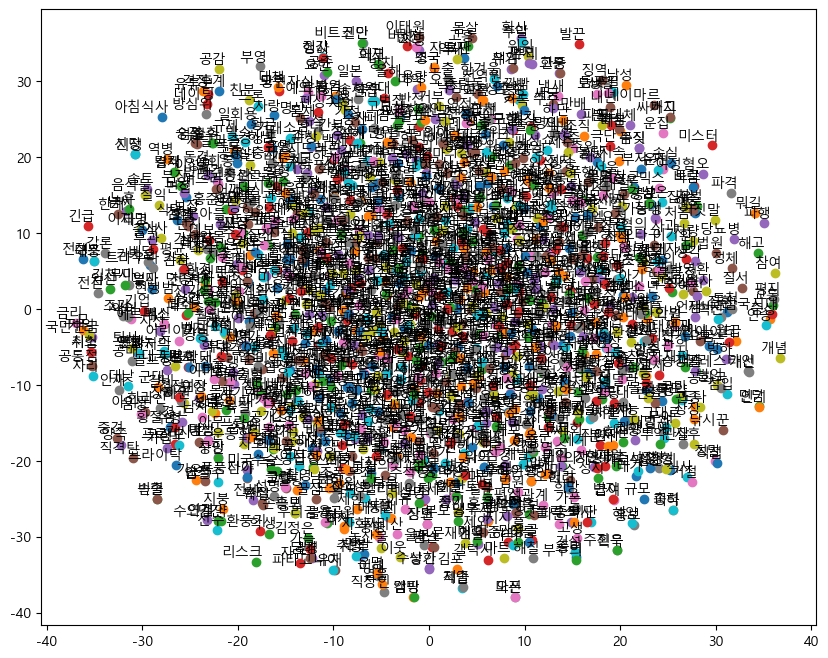

In [182]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(model.wv.vectors)
plt.figure(figsize=(10, 8))
for i, word in enumerate(model.wv.index_to_key):
    x, y = word_vectors_2d[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.show()